# Inferring phospho peptides

In the following we will use AlphaQuant's proteoform analysis and combine it with deep learning predictions that give a probability how prone a certain peptide sequence is to phosphorylation. We use the combination of those two to predict phorphorylated proteoforms.

As with the standard differential expression analysis, we need:

* an input file from a proteomics search engine. We support most common search engines. Specifications on input files are given in our [README](https://github.com/MannLabs/alphaquant/blob/master/README.md#preparing-input-files).
* a sample mapping file that maps each sample to a condition (e.g.  sample 'brain_replicate_1' is mapped to condition 'brain').
* (optional) a results directory can be defined on where to save the data
* (optional) a list where we specify, which conditions we compare

Additionally, we need to specify, wether we want to perform 




In [1]:
INPUT_FILE = "./data/phospho/proteome_subset.tsv"
SAMPLEMAP_FILE = "./data/phospho/samplemap_proteome.tsv"
RESULTS_DIRECTORY = "./data/phospho/results_phospho_inference"

CONDPAIRS_LIST = [("egf_treated", "untreated")] #this means each fc is egf_treated/untreated


In [2]:
import alphaquant.run_pipeline as aq_pipeline

aq_pipeline.run_pipeline(input_file=INPUT_FILE, samplemap_file=SAMPLEMAP_FILE, results_dir=RESULTS_DIRECTORY, condpairs_list=CONDPAIRS_LIST, organism="human", perform_phospho_inference=True, cluster_threshold_pval=0.01, take_median_ion=False)

using input type spectronaut_fragion_isotopes
removed pre existing /Users/constantin/workspace/alphaquant/example_nbs/data/phospho/proteome_subset.tsv.ml_info_table.tsv
start processeing condpair ('egf_treated', 'untreated')
normalized within conditions
median 0.3736080582187675, mode 0.49142721072130446
using mode for shift
shift comparison by -0.49142721072130446
normalized between conditions
t_ion2nonan_sw 0.008213281631469727
t_intensity_selection 0.1358180046081543
t_ion2nonan_sw 0.008304834365844727
t_intensity_selection 0.13229012489318848
checked 0 of 4178 ions
checked 2000 of 4178 ions
checked 4000 of 4178 ions
checked 0 of 30 prots

condition pair ('egf_treated', 'untreated') finished!



In [6]:
import pandas as pd

proteoform_df = pd.read_csv(RESULTS_DIRECTORY + "/egf_treated_VS_untreated.proteoforms.tsv", sep='\t')
display(proteoform_df)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,likely_phospho,fcdiff
0,O00311,O00311_0,0,True,SEQ_LLDLNPASR_;SEQ_FVQSEAQQER_;SEQ_HLIPTSHPIR_...,8,0.053333,0.033040,1.00,False,0.000000
1,O43164;O43164-2,O43164;O43164-2_0,0,True,SEQ_HGEDNDHLQLSAEVVEGSR_;SEQ_SSAGDTEFVHQNSQEIQ...,11,0.083810,-0.288567,1.00,False,0.000000
2,O95159,O95159_0,0,True,SEQ_LATVNWAR_;SEQ_DDDRTPGLHGDCDDDK_;SEQ_LCNIPL...,6,0.053333,-0.189684,1.00,True,0.000000
3,P00533,P00533_0,0,True,SEQ_MHLPSPTDSNFYR_;SEQ_NGLQSCPIK_;SEQ_GMNYLEDR...,24,0.251429,-0.071428,0.60,False,0.000000
4,P00533,P00533_1,1,False,SEQ_DPHYQDPHSTAVGNPEYLNTVQPTCVNSTFDSPAHWAQK_;S...,9,0.175238,-0.574294,0.23,True,0.502866
5,P00533,P00533_2,2,False,SEQ_SPSDCCHNQCAAGCTGPR_;SEQ_GPDNCIQCAHYIDGPHCV...,5,0.114286,0.454622,0.12,False,0.526051
6,P00533,P00533_3,3,False,SEQ_TPLLSSLSATSNNSTVACIDR_;SEQ_ELVEPLTPSGEAPNQ...,2,0.129524,-1.585065,0.05,True,1.513637
7,P22681,P22681_0,0,True,SEQ_GIFPSGLFQGDTFR_;SEQ_NQNPDLTGLCEPTPQDHIK_;S...,16,0.099048,-0.074860,1.00,False,0.000000
8,P33176,P33176_0,0,True,SEQ_GHSAQIAK_;SEQ_PATAIGVIGNFTDAER_;SEQ_GLEETV...,41,0.326349,-0.188568,0.91,False,0.000000
9,P33176,P33176_1,1,False,SEQ_QAVEQQIQSHR_;SEQ_LHDPEGMGIIPR_;SEQ_LHELTVM...,4,0.236190,0.304229,0.09,False,0.492797


In [7]:
import alphaquant.utils.diffquant_utils as aq_diffquant_utils

proteoform_df_filtered = aq_diffquant_utils.filter_proteoform_df(proteoform_df=proteoform_df, min_num_peptides=1, fcdiff_cutoff=0, likely_phospho=True, keep_reference_proteoform=True)
display(proteoform_df_filtered)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,likely_phospho,fcdiff
4,P00533,P00533_1,1,False,SEQ_DPHYQDPHSTAVGNPEYLNTVQPTCVNSTFDSPAHWAQK_;S...,9,0.175238,-0.574294,0.23,True,0.502866
6,P00533,P00533_3,3,False,SEQ_TPLLSSLSATSNNSTVACIDR_;SEQ_ELVEPLTPSGEAPNQ...,2,0.129524,-1.585065,0.05,True,1.513637
16,P60953,P60953_2,2,False,SEQ_YVECSALTQK_,1,0.099048,-1.048037,0.12,True,0.957392
20,Q14596;Q14596-2,Q14596;Q14596-2_1,1,False,SEQ_LPAALEQVR_;SEQ_TDDLTCQQEETFLLAK_;SEQ_PGLGQ...,4,0.053333,-0.449748,0.50,True,0.805270
44,Q9Y3I0,Q9Y3I0_1,1,False,SEQ_GMAAAGNYAWVNR_;SEQ_TNLDESDVQPVK_;SEQ_SYNDE...,7,0.114286,-0.549752,0.29,True,0.651188
3,P00533,P00533_0,0,True,SEQ_MHLPSPTDSNFYR_;SEQ_NGLQSCPIK_;SEQ_GMNYLEDR...,24,0.251429,-0.071428,0.60,False,0.000000
14,P60953,P60953_0,0,True,SEQ_TCLLISYTTNK_;SEQ_DDPSTIEK_;SEQ_NVFDEAILAAL...,6,0.281905,-0.090646,0.75,False,0.000000
19,Q14596;Q14596-2,Q14596;Q14596-2_0,0,True,SEQ_GAEGKPGVEAGQEPAEAGER_;SEQ_PGVEAGQEPAEAGER_...,4,0.068571,0.355522,0.50,False,0.000000
43,Q9Y3I0,Q9Y3I0_0,0,True,SEQ_MLQADPNK_;SEQ_GGGVGGFLPAMK_;SEQ_LVMEEAPESY...,17,0.266667,0.101436,0.71,True,0.000000


P00533


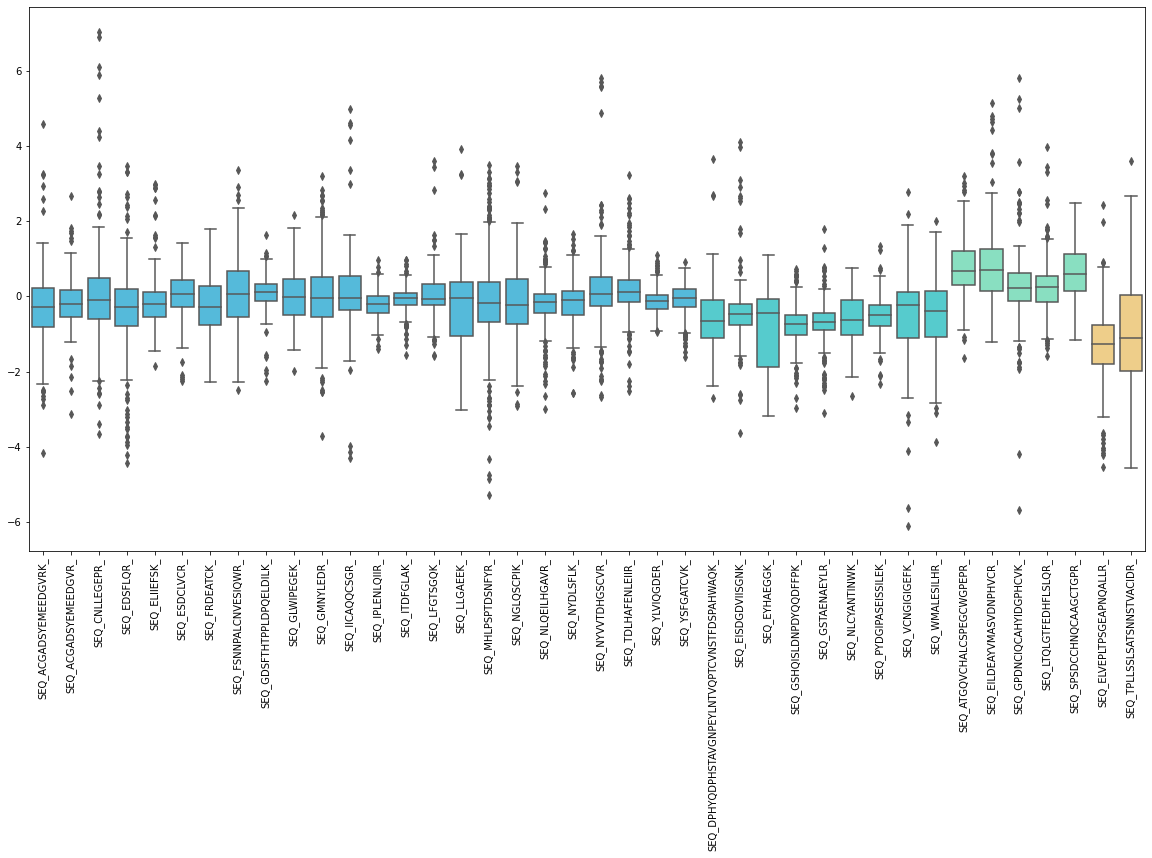

P60953


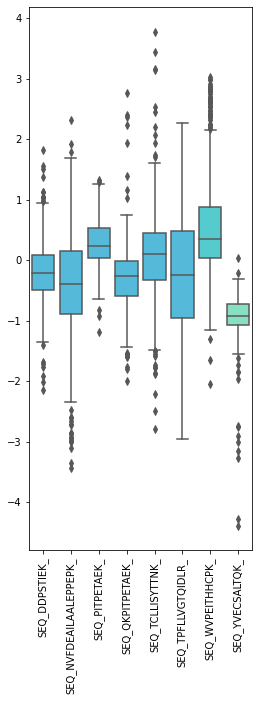

Q14596;Q14596-2


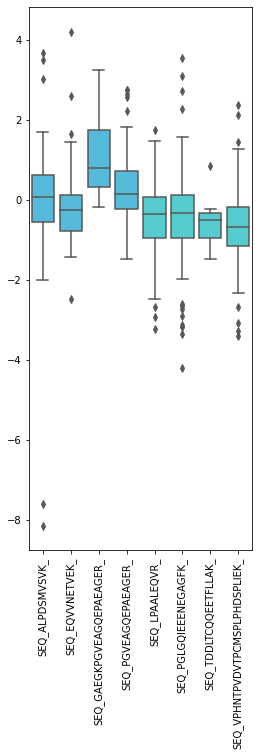

Q9Y3I0


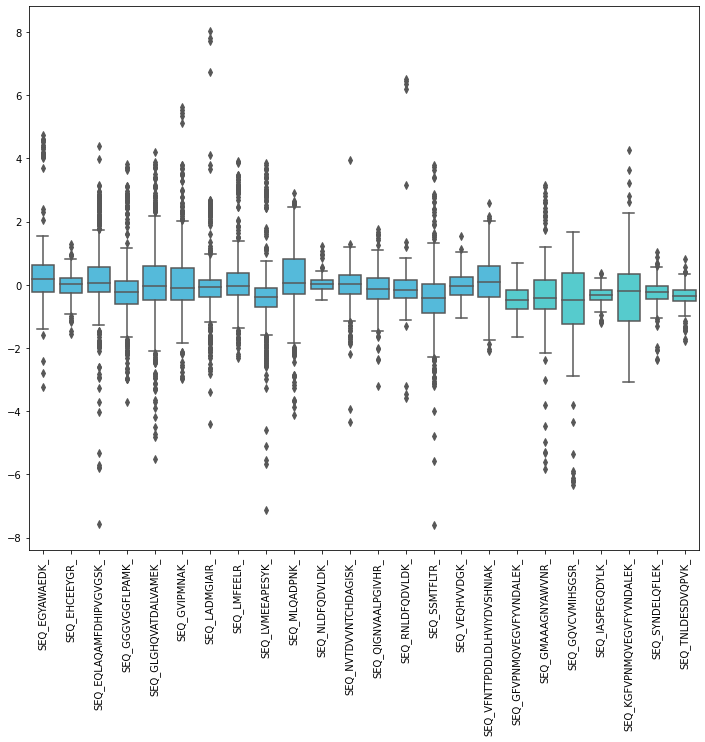

In [8]:
import alphaquant.plotting.fcviz as aq_fcviz
import alphaquant.plotting.base_functions as aq_base_functions
import alphaquant.utils.utils as aq_utils

plotconfig = aq_fcviz.PlotConfig()
plotconfig.colorlist = aq_base_functions.AlphaPeptColorMap().colorlist #change the colorlist to the AlphaPept colorlist, not necessary

quantification_info = aq_fcviz.CondpairQuantificationInfo(("egf_treated", "untreated"), RESULTS_DIRECTORY, SAMPLEMAP_FILE)

#load the trees containing the tree-based quantification info
condpair_tree = aq_utils.read_condpair_tree("egf_treated", "untreated", results_folder=RESULTS_DIRECTORY)


protein2node = {x.name : x for x in condpair_tree.children}
for protein_of_interest in proteoform_df_filtered['protein'].unique():
    print(protein_of_interest)
    protein_node = protein2node[protein_of_interest]
    cluster_plotter = aq_fcviz.FCPlotter(protein_node, quantification_info, plotconfig)
